## Meeting Structure & Business Understanding

- **Purpose**: Use data analytics to improve targeting and increase sales.
- **Agenda**: Intro → Problem understanding → Insights → ML Model → Business value → Q&A → Next steps.
- **Business Context**: Sports Wear Group is digitally transforming and wants to enhance marketing ROI.
- **Problem**: High volume of non-converting customers = wasted campaign spend.
- **Solution Value**:
  - Smarter targeting → Better conversions.
  - Lower spend → Higher Return of investement.
  - Simulations → Data-driven decisions.
- **Objections Handling**:
  - Complement current tools.
  - Transparent metrics to show value.
  - Quick wins to prove impact.


# summary of preprocessing

In [1]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["check null value", "dubilcated values", "outliers","Skewness","encoding","normalization"]
table.add_row(["I have not null values", "I have not dubilcated values","check with Percentile and solve with median ", "use log with positive values, I used boxcox with large positive skewness and  yeo-johnson with negative skewness","I use target encoding with article columns because of alot of values and the other columns  I used LabelEncoder and save original data","I used MinMaxScaler"])
print(table)

+------------------------+------------------------------+----------------------------------------------+------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------+---------------------+
|    check null value    |      dubilcated values       |                   outliers                   |                                                     Skewness                                                     |                                                                encoding                                                                |    normalization    |
+------------------------+------------------------------+----------------------------------------------+------------------------------------------------------------------------------------------------------------------+-----------------------

## Business value of the Model


In [57]:
businesstable = PrettyTable()
businesstable.field_names = ["Improvemed targeting","Cost saving","Campaign testing"]
businesstable.add_row(["By focsing on high probability of buyers","Reduce sepnd on marketing by avoiding wrong people","make simulate before running the campaign to make sure that the campaign will be reach the target audience"])
print(businesstable)

+------------------------------------------+----------------------------------------------------+------------------------------------------------------------------------------------------------------------+
|           Improvemed targeting           |                    Cost saving                     |                                              Campaign testing                                              |
+------------------------------------------+----------------------------------------------------+------------------------------------------------------------------------------------------------------------+
| By focsing on high probability of buyers | Reduce sepnd on marketing by avoiding wrong people | make simulate before running the campaign to make sure that the campaign will be reach the target audience |
+------------------------------------------+----------------------------------------------------+---------------------------------------------------------------------------

# Imports

In [18]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,roc_curve,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

# check data

In [19]:
data=pd.read_csv("full_gen_data.csv")
data.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0


In [20]:
data["label"].value_counts()

label
0    86072
1    13928
Name: count, dtype: int64

C:\Users\youss\AppData\Local\Temp\ipykernel_14948\697980632.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="label", palette="Set2")


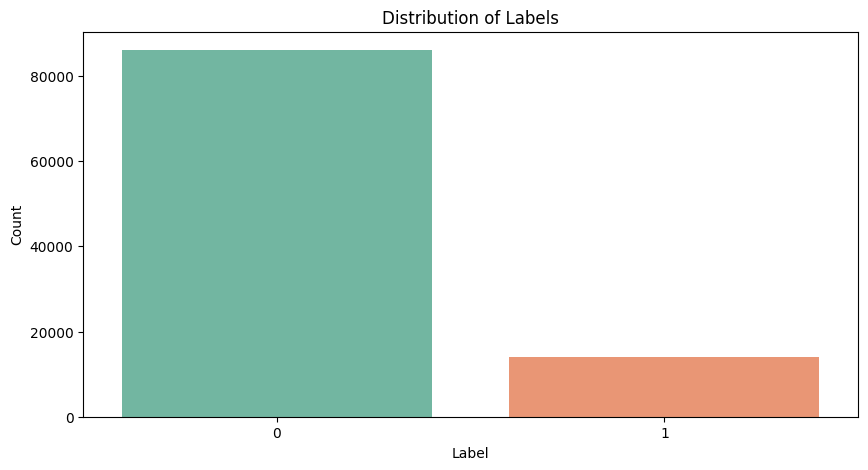

In [21]:
# check if data is implance or not
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x="label", palette="Set2")
plt.title("Distribution of Labels")
plt.xlabel("Label")
plt.ylabel("Count") 
plt.show()

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   country         100000 non-null  object 
 1   article         100000 non-null  object 
 2   sales           100000 non-null  int64  
 3   regular_price   100000 non-null  float64
 4   current_price   100000 non-null  float64
 5   ratio           100000 non-null  float64
 6   retailweek      100000 non-null  object 
 7   promo1          100000 non-null  int64  
 8   promo2          100000 non-null  int64  
 9   customer_id     100000 non-null  float64
 10  article.1       100000 non-null  object 
 11  productgroup    100000 non-null  object 
 12  category        100000 non-null  object 
 13  cost            100000 non-null  float64
 14  style           100000 non-null  object 
 15  sizes           100000 non-null  object 
 16  gender          100000 non-null  object 
 17  rgb_r_main_

In [23]:
data.describe()

,sales,regular_price,current_price,ratio,promo1,promo2,customer_id,cost,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,56.781800,52.391200,28.290800,0.545646,0.061900,0.004900,2721.726500,6.517000,161.400000,139.600000,133.500000,207.700000,181.400000,209.900000,0.13928
std,87.934743,35.272128,22.578343,0.194363,0.240975,0.069829,1908.085499,3.914728,39.790147,63.641814,81.148727,35.313205,23.474359,45.306849,0.34624
min,1.000000,3.950000,1.950000,0.296482,0.000000,0.000000,1.000000,1.290000,79.000000,26.000000,0.000000,164.000000,155.000000,155.000000,0.00000
25%,10.000000,25.950000,11.950000,0.354839,0.000000,0.000000,1017.000000,2.290000,138.000000,104.000000,57.000000,164.000000,155.000000,155.000000,0.00000
50%,26.000000,40.950000,20.950000,0.525044,0.000000,0.000000,2091.000000,6.950000,160.000000,144.000000,143.000000,205.000000,187.000000,238.000000,0.00000
75%,64.000000,79.950000,37.950000,0.699248,0.000000,0.000000,4570.250000,9.600000,205.000000,181.000000,205.000000,255.000000,211.000000,255.000000,0.00000
max,898.000000,197.950000,195.950000,1.000000,1.000000,1.000000,5999.000000,13.290000,205.000000,238.000000,250.000000,255.000000,211.000000,255.000000,1.00000


# EDA

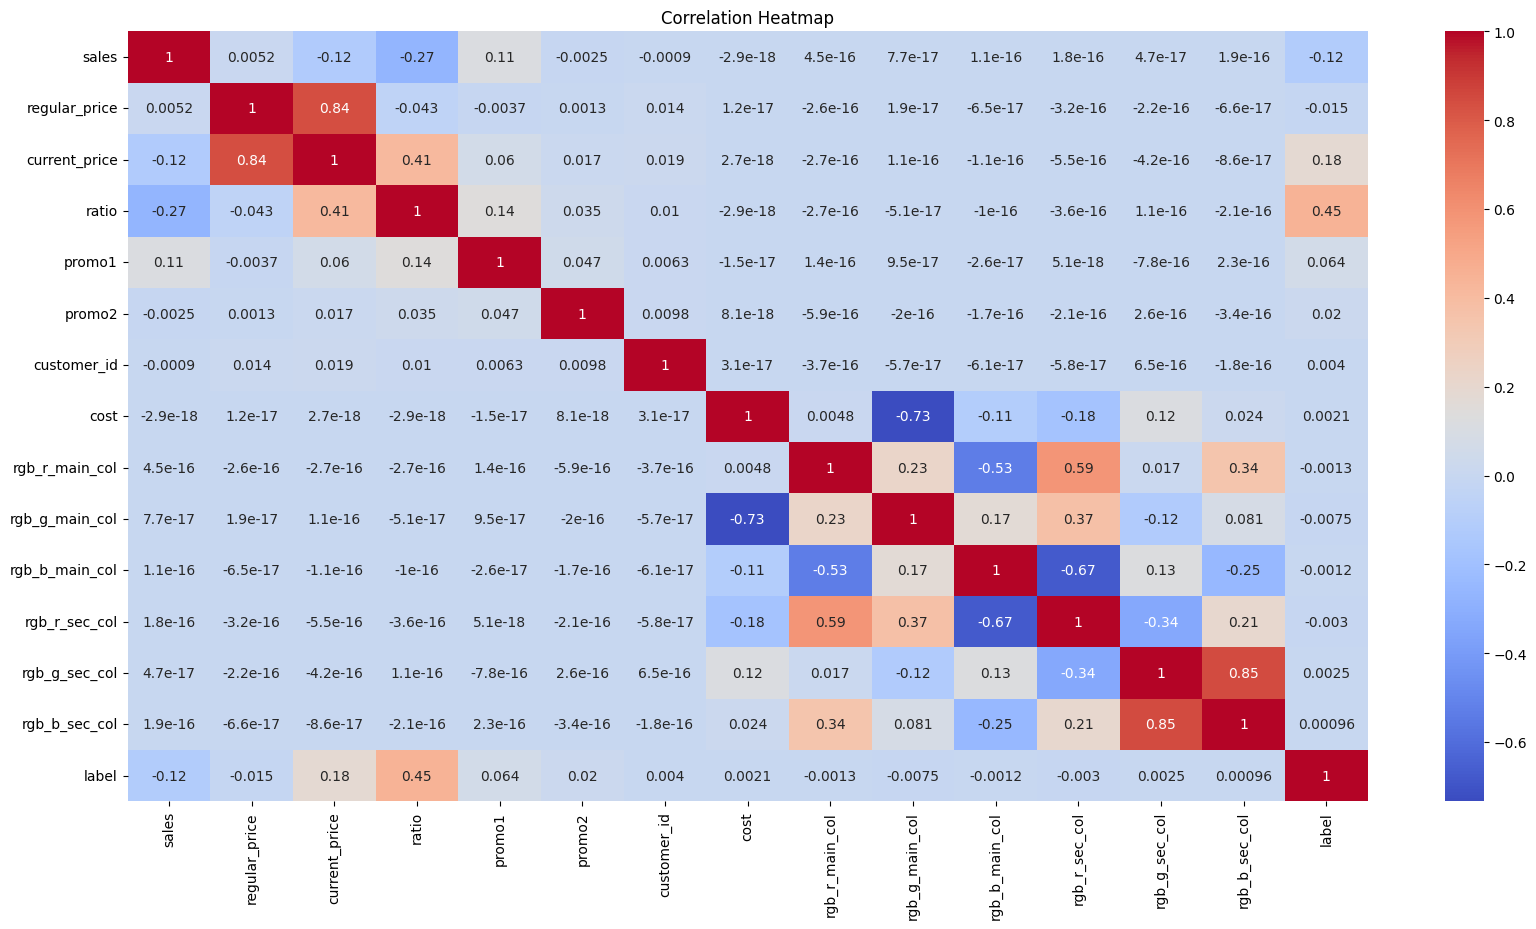

In [24]:
num_data=data.select_dtypes(include=[np.number])
plt.figure(figsize=(20, 10))
sns.heatmap(num_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

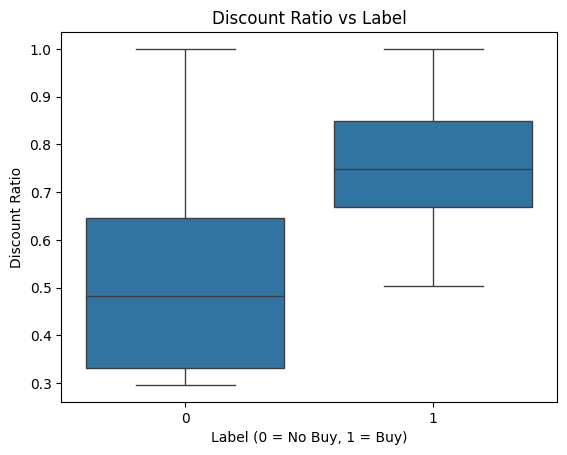

In [25]:
# 
sns.boxplot(data=data, x='label', y='ratio')
plt.title('Discount Ratio vs Label')
plt.xlabel('Label (0 = No Buy, 1 = Buy)')
plt.ylabel('Discount Ratio')
plt.show()


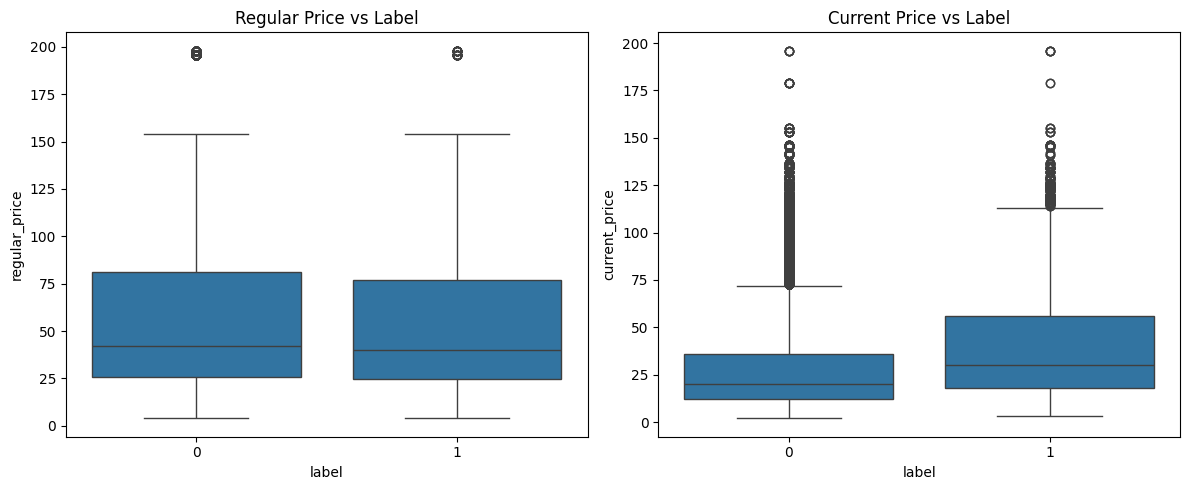

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(data=data, x='label', y='regular_price', ax=axes[0])
axes[0].set_title('Regular Price vs Label')

sns.boxplot(data=data, x='label', y='current_price', ax=axes[1])
axes[1].set_title('Current Price vs Label')

plt.tight_layout()
plt.show()


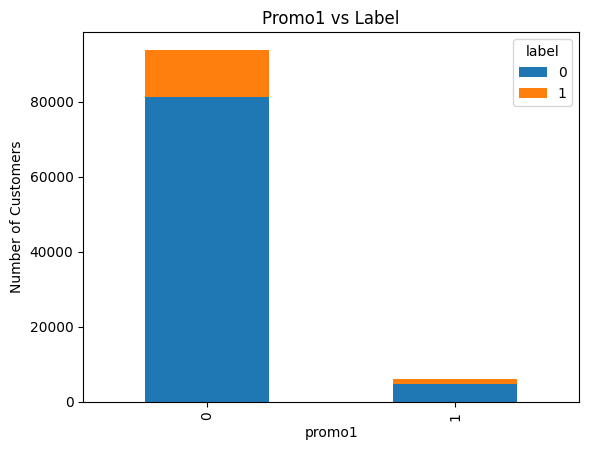

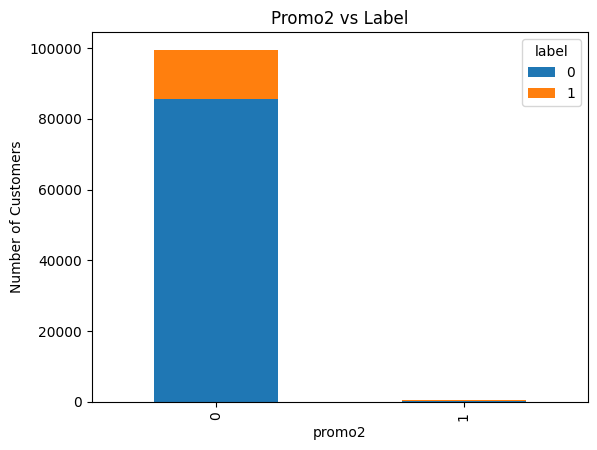

In [27]:

promo_df = data.groupby(['promo1', 'label']).size().unstack().fillna(0)
promo_df.plot(kind='bar', stacked=True)
plt.title('Promo1 vs Label')
plt.ylabel('Number of Customers')
plt.show()

promo_df2 = data.groupby(['promo2', 'label']).size().unstack().fillna(0)
promo_df2.plot(kind='bar', stacked=True)
plt.title('Promo2 vs Label')
plt.ylabel('Number of Customers')
plt.show()


Both of last charts indicate majority of customers not got promo 1 or 2 on class (0) which explian why alot of customers didn't purchase
on the other hand although fewer customers recived a promotion on class (1) who did purchaed 

# preprocessing

In [28]:
number_daat=data.select_dtypes(include=[np.number]).columns.tolist()
number_data=data[number_daat]

In [29]:
category_data=data.select_dtypes("object")


In [30]:
total_rows=number_data.shape[0]
null_data = number_data.isna().sum().reset_index().rename(columns = {0: "Nulls_Count", "index": "Column_Name"}).sort_values(by="Nulls_Count", ascending=False)
null_data['Percentage']=(null_data['Nulls_Count']/total_rows)*100
null_data[null_data["Nulls_Count"] > 0]

,Column_Name,Nulls_Count,Percentage


In [31]:
total_rows=category_data.shape[0]
null_data = category_data.isna().sum().reset_index().rename(columns = {0: "Nulls_Count", "index": "Column_Name"}).sort_values(by="Nulls_Count", ascending=False)
null_data['Percentage']=(null_data['Nulls_Count']/total_rows)*100
null_data[null_data["Nulls_Count"] > 0]

,Column_Name,Nulls_Count,Percentage


In [32]:
data.duplicated().sum() #check duplicated data  

0

In [33]:
data_without_target=data.drop(columns=["label"])
target=data["label"]

In [34]:
def check_outliers(df):
    for col in df.columns:
        if df[col].dtype != 'object':
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - (1.5 * iqr)
            upper_bound = q3 + (1.5 * iqr)
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            print(f"Column: {col}")
            print(f"Outliers: {len(outliers)}")
    return df
check_outliers(data_without_target)        

Column: sales
Outliers: 9540
Column: regular_price
Outliers: 280
Column: current_price
Outliers: 4480
Column: ratio
Outliers: 0
Column: promo1
Outliers: 6190
Column: promo2
Outliers: 490
Column: customer_id
Outliers: 0
Column: cost
Outliers: 0
Column: rgb_r_main_col
Outliers: 0
Column: rgb_g_main_col
Outliers: 0
Column: rgb_b_main_col
Outliers: 0
Column: rgb_r_sec_col
Outliers: 0
Column: rgb_g_sec_col
Outliers: 0
Column: rgb_b_sec_col
Outliers: 0


,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,cost,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,13.29,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,2.29,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,1.70,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,9.00,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,9.60,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,...,4.20,wide,"xxs,xs,s,m,l,xl,xxl",women,79,148,205,164,211,238
99996,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,...,9.90,wide,"xs,s,m,l,xl",unisex,139,26,26,205,155,155
99997,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,...,5.20,wide,"xxs,xs,s,m,l,xl,xxl",women,135,206,250,205,155,155
99998,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,...,1.29,slim,"xxs,xs,s,m,l,xl,xxl",women,181,181,181,205,155,155


In [35]:
def solve_outliers(df):
    for col in df.columns:
        if df[col].dtype != 'object':
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - (1.5 * iqr)
            upper_bound = q3 + (1.5 * iqr)
            median=df[col].median()
            df[col] = np.where(df[col] < lower_bound, median, df[col])
            df[col] = np.where(df[col] > upper_bound, median, df[col])
            print(f"Column: {col}")
            print(f"Outliers: {len(df[(df[col] < lower_bound) | (df[col] > upper_bound)])}")
           
    return df
data_cleaned=solve_outliers(data_without_target)        

Column: sales
Outliers: 0
Column: regular_price
Outliers: 0
Column: current_price
Outliers: 0
Column: ratio
Outliers: 0
Column: promo1
Outliers: 0
Column: promo2
Outliers: 0
Column: customer_id
Outliers: 0
Column: cost
Outliers: 0
Column: rgb_r_main_col
Outliers: 0
Column: rgb_g_main_col
Outliers: 0
Column: rgb_b_main_col
Outliers: 0
Column: rgb_r_sec_col
Outliers: 0
Column: rgb_g_sec_col
Outliers: 0
Column: rgb_b_sec_col
Outliers: 0


In [36]:
# solve skwness
def fix_skewness(df):
    df_fixed=df.copy()
    skewed_cols=[]
    for col in df.columns:
        if df_fixed[col].dtype!= 'object':
            skewness=df_fixed[col].skew()
            if abs(skewness)>0.5:
                skewed_cols.append(col)
                #log1p with positive values
                if skewness>=0:
                    df_fixed[col]=np.log1p(df_fixed[col])
                elif df_fixed[col].min() > 0:
                #boxcox with large positive skewness    
                    df_fixed[col]=boxcox(df_fixed[col])[0]
                else:
                    #yeo-johnson with negative skewness
                    pt = PowerTransformer(method='yeo-johnson')
                    df_fixed[col] = pt.fit_transform(df_fixed[[col]])
    if not skewed_cols:
        print("No skewed columns found.")                
            
    return df
data_cleaned=fix_skewness(data_cleaned)
data_cleaned.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,cost,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col
0,Germany,YN8639,28.0,5.95,3.95,0.663866,2016-03-27,0.0,0.0,1003.0,...,13.29,slim,"xxs,xs,s,m,l,xl,xxl",women,205.0,104.0,57.0,255.0,187.0,255.0
1,Germany,YN8639,28.0,5.95,3.95,0.663866,2016-03-27,0.0,0.0,1003.0,...,2.29,regular,"xxs,xs,s,m,l,xl,xxl",women,188.0,238.0,104.0,255.0,187.0,255.0
2,Germany,YN8639,28.0,5.95,3.95,0.663866,2016-03-27,0.0,0.0,1003.0,...,1.70,regular,"xxs,xs,s,m,l,xl,xxl",women,205.0,173.0,0.0,255.0,187.0,255.0
3,Germany,YN8639,28.0,5.95,3.95,0.663866,2016-03-27,0.0,0.0,1003.0,...,9.00,regular,"xxs,xs,s,m,l,xl,xxl",kids,205.0,140.0,149.0,164.0,211.0,238.0
4,Germany,YN8639,28.0,5.95,3.95,0.663866,2016-03-27,0.0,0.0,1003.0,...,9.60,regular,"xxs,xs,s,m,l,xl,xxl",women,138.0,43.0,226.0,164.0,211.0,238.0


In [37]:
# to know if column is significant or not because if not I'll drop it

chi2_stat, p_val, dof, ex = chi2_contingency(pd.crosstab(data['article.1'], data['label']))
print(f"P-value: {p_val}")
if p_val < 0.05:  # Typically, a p-value < 0.05 suggests significance
    print("The column is significant.")
else:
    print("The column is not significant.")    
    


P-value: 0.3714374000084793
The column is not significant.


In [38]:
data_cleaned=data_cleaned.drop(columns=["article.1"],axis=1)

In [39]:
# to know if column is significant or not because if not I'll drop it

chi2_stat, p_val, dof, ex = chi2_contingency(pd.crosstab(data['article'], data['label']))
print(f"P-value: {p_val}")
if p_val < 0.05:  # Typically, a p-value < 0.05 suggests significance
    print("The column is significant.")


P-value: 1.0732788687682343e-147
The column is significant.


In [40]:
data_cleaned['retailweek']=pd.to_datetime(data_cleaned['retailweek'])

In [41]:
data_cleaned=pd.concat([data_cleaned,target], axis=1)

In [42]:
# I'll use target encoding with article because I have alot of unique values
def target_encode(data, target_col, cat_col):
    mean_encoded = data.groupby(cat_col)[target_col].mean()
    data[cat_col] = data[cat_col].map(mean_encoded)
    return data
data_cleaned = target_encode(data_cleaned, 'label', 'article')
data_cleaned.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
0,Germany,0.2,28.0,5.95,3.95,0.663866,2016-03-27,0.0,0.0,1003.0,...,slim,"xxs,xs,s,m,l,xl,xxl",women,205.0,104.0,57.0,255.0,187.0,255.0,0
1,Germany,0.2,28.0,5.95,3.95,0.663866,2016-03-27,0.0,0.0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,188.0,238.0,104.0,255.0,187.0,255.0,0
2,Germany,0.2,28.0,5.95,3.95,0.663866,2016-03-27,0.0,0.0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,205.0,173.0,0.0,255.0,187.0,255.0,0
3,Germany,0.2,28.0,5.95,3.95,0.663866,2016-03-27,0.0,0.0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",kids,205.0,140.0,149.0,164.0,211.0,238.0,0
4,Germany,0.2,28.0,5.95,3.95,0.663866,2016-03-27,0.0,0.0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,138.0,43.0,226.0,164.0,211.0,238.0,0


In [43]:
LabelEncoder=LabelEncoder()
for col in data_cleaned.select_dtypes(include=['object']).columns:
    data_cleaned[f'original_{col}'] = data_cleaned[col].copy() # to save the original values because if I want to use them later

    data_cleaned[col] = LabelEncoder.fit_transform(data_cleaned[col])# convert to numerical values
data_cleaned.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label,original_country,original_productgroup,original_category,original_style,original_sizes,original_gender
0,2,0.2,28.0,5.95,3.95,0.663866,2016-03-27,0.0,0.0,1003.0,...,255.0,187.0,255.0,0,Germany,SHOES,TRAINING,slim,"xxs,xs,s,m,l,xl,xxl",women
1,2,0.2,28.0,5.95,3.95,0.663866,2016-03-27,0.0,0.0,1003.0,...,255.0,187.0,255.0,0,Germany,SHORTS,TRAINING,regular,"xxs,xs,s,m,l,xl,xxl",women
2,2,0.2,28.0,5.95,3.95,0.663866,2016-03-27,0.0,0.0,1003.0,...,255.0,187.0,255.0,0,Germany,HARDWARE ACCESSORIES,GOLF,regular,"xxs,xs,s,m,l,xl,xxl",women
3,2,0.2,28.0,5.95,3.95,0.663866,2016-03-27,0.0,0.0,1003.0,...,164.0,211.0,238.0,0,Germany,SHOES,RUNNING,regular,"xxs,xs,s,m,l,xl,xxl",kids
4,2,0.2,28.0,5.95,3.95,0.663866,2016-03-27,0.0,0.0,1003.0,...,164.0,211.0,238.0,0,Germany,SHOES,RELAX CASUAL,regular,"xxs,xs,s,m,l,xl,xxl",women


In [44]:
num_data=data_cleaned.select_dtypes(include=[np.number]).columns.tolist()
number_data=data_cleaned[num_data]
train_data = number_data.drop(columns=["label"],axis=1)
y = number_data["label"]

min_max_scaler = MinMaxScaler()
min_max_scaled_data = min_max_scaler.fit_transform(train_data)

min_max_scaled_model = pd.DataFrame(min_max_scaled_data, columns=train_data.columns)

min_max_scaled_model.head()

,country,article,sales,regular_price,current_price,ratio,promo1,promo2,customer_id,productgroup,...,cost,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col
0,1.0,0.459459,0.1875,0.013333,0.026667,0.522209,0.0,0.0,0.167056,0.333333,...,1.000000,0.5,1.0,1.0,1.000000,0.367925,0.228,1.0,0.571429,1.00
1,1.0,0.459459,0.1875,0.013333,0.026667,0.522209,0.0,0.0,0.167056,0.666667,...,0.083333,0.0,1.0,1.0,0.865079,1.000000,0.416,1.0,0.571429,1.00
2,1.0,0.459459,0.1875,0.013333,0.026667,0.522209,0.0,0.0,0.167056,0.000000,...,0.034167,0.0,1.0,1.0,1.000000,0.693396,0.000,1.0,0.571429,1.00
3,1.0,0.459459,0.1875,0.013333,0.026667,0.522209,0.0,0.0,0.167056,0.333333,...,0.642500,0.0,1.0,0.0,1.000000,0.537736,0.596,0.0,1.000000,0.83
4,1.0,0.459459,0.1875,0.013333,0.026667,0.522209,0.0,0.0,0.167056,0.333333,...,0.692500,0.0,1.0,1.0,0.468254,0.080189,0.904,0.0,1.000000,0.83


In [45]:
final_data=pd.concat([min_max_scaled_model, y], axis=1)
final_data.head()

,country,article,sales,regular_price,current_price,ratio,promo1,promo2,customer_id,productgroup,...,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
0,1.0,0.459459,0.1875,0.013333,0.026667,0.522209,0.0,0.0,0.167056,0.333333,...,0.5,1.0,1.0,1.000000,0.367925,0.228,1.0,0.571429,1.00,0
1,1.0,0.459459,0.1875,0.013333,0.026667,0.522209,0.0,0.0,0.167056,0.666667,...,0.0,1.0,1.0,0.865079,1.000000,0.416,1.0,0.571429,1.00,0
2,1.0,0.459459,0.1875,0.013333,0.026667,0.522209,0.0,0.0,0.167056,0.000000,...,0.0,1.0,1.0,1.000000,0.693396,0.000,1.0,0.571429,1.00,0
3,1.0,0.459459,0.1875,0.013333,0.026667,0.522209,0.0,0.0,0.167056,0.333333,...,0.0,1.0,0.0,1.000000,0.537736,0.596,0.0,1.000000,0.83,0
4,1.0,0.459459,0.1875,0.013333,0.026667,0.522209,0.0,0.0,0.167056,0.333333,...,0.0,1.0,1.0,0.468254,0.080189,0.904,0.0,1.000000,0.83,0


# feature engineering

In [46]:
discount=1-final_data["ratio"]
final_data["discoint"]=discount

In [47]:
final_data["discoint"].isnull().sum() # check if there is null values

0

# Build Model

In [48]:
features=final_data.drop(columns=["label"],axis=1)
target=final_data["label"]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [49]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80000, 22), (20000, 22), (80000,), (20000,))

In [50]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
models = {
    "XGBClassifier": XGBClassifier(tree_method="gpu_hist" if device == "cuda" else "hist", use_label_encoder=False, verbosity=0),
    "RandomForestClassifier": RandomForestClassifier(class_weight="balanced"),
    "DecisionTreeClassifier": DecisionTreeClassifier(class_weight="balanced"), 
    "LogisticRegression":LogisticRegression(class_weight="balanced"),
    "LightBoosting":lgb.LGBMClassifier()

}

Training model: XGBClassifier
Train Score for XGBClassifier: 0.88385
Test Score for XGBClassifier: 0.85515
Training model: RandomForestClassifier
Train Score for RandomForestClassifier: 0.9999875
Test Score for RandomForestClassifier: 0.85355
Training model: DecisionTreeClassifier
Train Score for DecisionTreeClassifier: 1.0
Test Score for DecisionTreeClassifier: 0.81105
Training model: LogisticRegression
Train Score for LogisticRegression: 0.7571
Test Score for LogisticRegression: 0.7529
Training model: LightBoosting
[LightGBM] [Info] Number of positive: 11117, number of negative: 68883
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001745 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1408
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.138

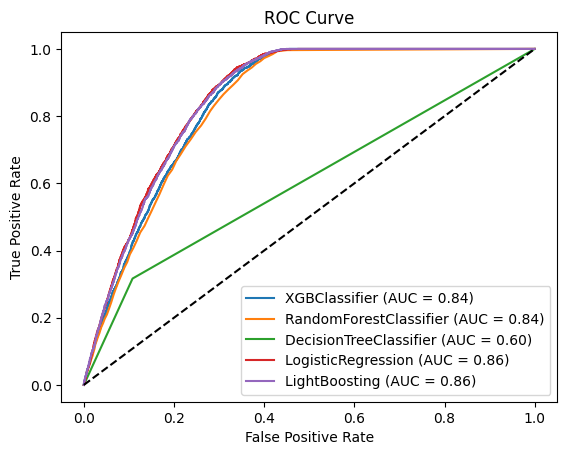

In [ ]:
trained_models = {}
for name, model in models.items():
    print(f"Training model: {name}")
    model.fit(X_train, y_train)  
    trained_models[name] = model
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f"Train Score for {name}: {train_score}")
    print(f"Test Score for {name}: {test_score}")

for name, model in trained_models.items():
    print(f"Evaluating {name}")
    
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    
    print(f"Confusion Matrix for {name}:")
    print(confusion_matrix(y_test, y_pred))
    
    if y_proba is not None:
        roc_auc = roc_auc_score(y_test, y_proba)
        print(f"ROC-AUC for {name}: {roc_auc:.2f}")
        
        # Plot ROC Curve I need to know it because I have High imbalance data because I have 0.9% of 1 and 99.1% of 0 and accuracy 
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
    else:
        print(f"{name} does not support probability estimates. Skipping ROC-AUC.")

plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

visualize reults on table

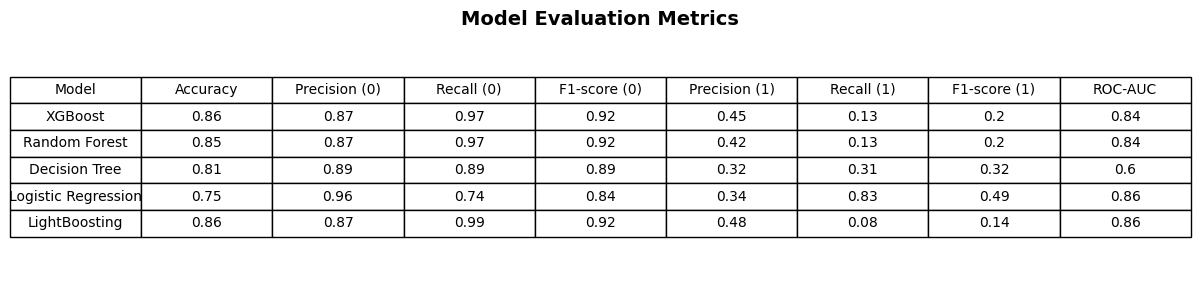

In [ ]:
data = {
    "Model": ["XGBoost", "Random Forest", "Decision Tree", "Logistic Regression", "LightBoosting"],
    "Accuracy": [0.86, 0.85, 0.81, 0.75, 0.86],
    "Precision (0)": [0.87, 0.87, 0.89, 0.96, 0.87],
    "Recall (0)": [0.97, 0.97, 0.89, 0.74, 0.99],
    "F1-score (0)": [0.92, 0.92, 0.89, 0.84, 0.92],
    "Precision (1)": [0.45, 0.42, 0.32, 0.34, 0.48],
    "Recall (1)": [0.13, 0.13, 0.31, 0.83, 0.08],
    "F1-score (1)": [0.20, 0.20, 0.32, 0.49, 0.14],
    "ROC-AUC": [0.84, 0.84, 0.60, 0.86, 0.86]
}

df = pd.DataFrame(data)


fig, ax = plt.subplots(figsize=(12, 3))
ax.axis('off') 

table = ax.table(cellText=df.values,
                 colLabels=df.columns,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)

plt.title("Model Evaluation Metrics", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


#I will choose Logistic beacause it was able to recognize the recall of class (1) 0.86%



Confusion Matrix for Logistic Regression:
[[12722  4467]
 [  475  2336]]
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.74      0.84     17189
           1       0.34      0.83      0.49      2811

    accuracy                           0.75     20000
   macro avg       0.65      0.79      0.66     20000
weighted avg       0.88      0.75      0.79     20000

ROC-AUC for Logistic Regression: 0.86


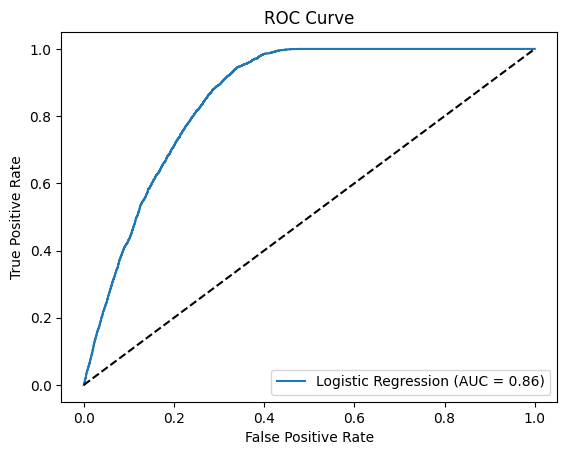

In [ ]:
lg=LogisticRegression(class_weight="balanced") # i choose class_weight to solve imbalnce data, mechanism is to give more weight to the minority class during training
# because the model will pay more attention to the minority class, which can help improve its performance on that class.

lg.fit(X_train, y_train)
y_pred=lg.predict(X_test)
y_pred_proba=lg.predict_proba(X_test)[:, 1]
y_pred_proba[:10] # check the probability of first 10 values
print(f"Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, y_pred))
print(f"Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred))
print(f"ROC-AUC for Logistic Regression: {roc_auc_score(y_test, y_pred_proba):.2f}")

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()